#### Import Necessary Libraries

In [60]:
import pandas as pd

#### Task 1: Merging 12 months of sales data into a single file

In [61]:
import os

# Set up file path
file_path = "./Sales_Data/"

# List all the files in the file path using listdir function
file_list = os.listdir(file_path)

#Create empty dataframe and merge all sales data into the dataframe
df = pd.DataFrame()
for file in file_list:
    data = pd.read_csv(file_path + file)
    df = pd.concat([df, data], axis = 0)

#Count the number of rows for each columns in the dataframe
df.count(axis=0)

#Convert to a single merged file
df.to_csv("Merged_Sales_Data.csv", index=False)

#### Read in updated dataframe and clean up the data

In [62]:
all_data = pd.read_csv("Merged_Sales_Data.csv")

all_data = all_data.dropna(how='all')

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Question 1: What was best month for sales? How much was earned that month ?


#### Task 2: Add additional month column

In [63]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

all_data['Month'] = all_data["Order Date"].str[0:2]

all_data['Month'] = all_data['Month'].astype('int32')

#### Task 3: Add additional sales column (Quantity * Price)

In [64]:
#Convert the Quantity Ordered into int data type
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
#Convert the Price Each into float data type
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data["Sales"] = all_data["Quantity Ordered"] * all_data ["Price Each"]

#### Task 4: Groupby month

In [65]:
result = all_data.groupby('Month').sum()

#### Task 5: Print the result represent the month with the highest sales

In [66]:
max_sales = result['Sales'].max()
max_month = result['Sales'].idxmax()

print(f"The maximum sales is {max_sales} in {max_month}.")

The maximum sales is 4613443.34 in 12.


#### Task 6: Plot the graph represent 12 months sales

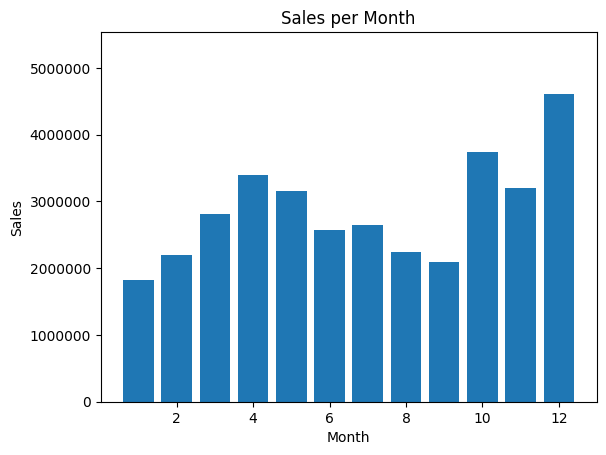

In [67]:
import matplotlib.pyplot as plt

result = all_data.groupby('Month').sum()
months = result.index
sales = result['Sales']


fig, ax = plt.subplots()
ax.bar(months, sales)
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.set_title('Sales per Month')
ax.set_ylim([0, 1.2*max(sales)])

plt.show()

#### Question 2: What city has the highest number of sale ?

#### Task 7: Add a city column

In [68]:
# all_data["Purchase Address"] = all_data["Purchase Address"].astype(str)
# all_data['City'] = all_data["Purchase Address"].apply(lambda x: x.split(',')[1])
# all_data

#all_data["City"] = all_data["Purchase Address"].str.split(',').str[1]

def get_city(address):
    return(address.split(",")[1])

def get_state(address):
    return(address.split(",")[2].split(" ")[1])

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


#### Task 8: Groupby City

In [69]:
result1 = all_data.groupby('City').sum()
max_sales1 = result1["Sales"].max()
max_city = result1["Sales"].idxmax()

print("The city has the highest sales is", max_city, "with", max_sales1)

The city has the highest sales is  San Francisco CA with 8262203.91


#### Task 9: Visualization The City Sales 

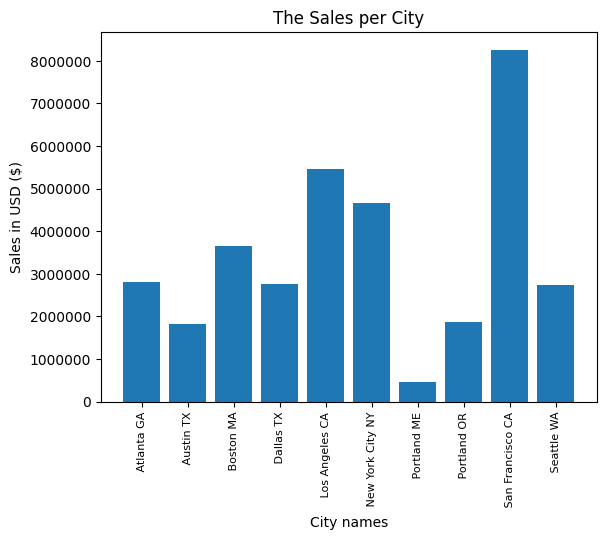

In [70]:
cities = [city for city, df in all_data.groupby('City')]

fig, ax = plt.subplots()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.bar(cities, result1["Sales"])
plt.title("The Sales per City")
plt.xticks(cities, rotation= 'vertical', size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City names")
plt.show()



##### Conclusion draw from the visualization: San Francisco is the city that consump the highest volume of products while Portland (ME) is the city that comsump the lowest volume of products. 

#### Question 3: What time should we display the advertisements to maximize the likelihood of customer's buying products ?

In [71]:
#Convert Order Date into Datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\emily\AppData\Local\Temp\ipykernel_2852\1375319803.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


#### Task 10: Add Hour and Minute columns

In [72]:
#Create Hour and Minute columns
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17,30


#### Task 11: Visualization the Sales distribution by hour

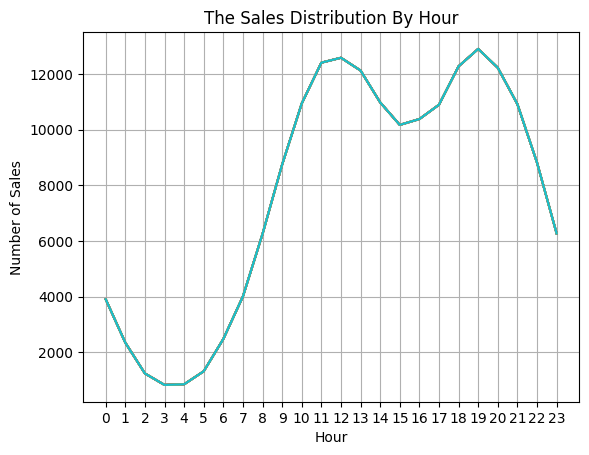

In [73]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.title("The Sales Distribution By Hour")
plt.xlabel("Hour")
plt.xticks(hours)
plt.grid()
plt.ylabel("Number of Sales")
plt.show()

##### Conclusion draw from the graph: There are two peak hour that have the most sales: 12 PM and 7 PM while in the early morning from 12 AM to 7 AM, it is the least effective time to conduct the advertisment

#### Question 4: What products are most often sold together?

#### Task 12: List out the duplicate order ID (one order buy multiple items)

In [79]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]
df['Grouped'] = all_data.groupby(all_data["Order ID"])["Product"].transform(lambda x: ','.join(x))

C:\Users\emily\AppData\Local\Temp\ipykernel_2852\3243662342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = all_data.groupby(all_data["Order ID"])["Product"].transform(lambda x: ','.join(x))


In [82]:
df = df[["Order ID","Grouped"]].drop_duplicates()

df.head(5)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Task 13: Count paired product in the "Grouped" dictionary 

In [86]:
#Count the pairs of the grouped items
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print("The combination of", key, "has been sold together", value, "times")

The combination of ('iPhone', 'Lightning Charging Cable') has been sold together 1005 times
The combination of ('Google Phone', 'USB-C Charging Cable') has been sold together 987 times
The combination of ('iPhone', 'Wired Headphones') has been sold together 447 times
The combination of ('Google Phone', 'Wired Headphones') has been sold together 414 times
The combination of ('Vareebadd Phone', 'USB-C Charging Cable') has been sold together 361 times
The combination of ('iPhone', 'Apple Airpods Headphones') has been sold together 360 times
The combination of ('Google Phone', 'Bose SoundSport Headphones') has been sold together 220 times
The combination of ('USB-C Charging Cable', 'Wired Headphones') has been sold together 160 times
The combination of ('Vareebadd Phone', 'Wired Headphones') has been sold together 143 times
The combination of ('Lightning Charging Cable', 'Wired Headphones') has been sold together 92 times
